### Breuch Pagan 

**The condition a.i is essentially untestable; explain why**

The condition  $\mathbb{E} [u.X] = \mathbb{E}u = 0$ is untestable since u is unbservable. To text that u is uncorellated with X, we would have to know the true value of u. 

**Breusch and Pagan (1979) argue that one can test a.ii via an
auxiliary regression** 

Starting with linear regression model

$y_i = \beta_0 + \beta_1 x_i + u_i$

Estimate the model coefficients using Ordinary Least Squares (OLS), and the calculate the residuals u_hat

$\hat{u}_i = y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i)$

square these residuals

$ \hat{u}_i^2 = (y_i - \hat{y}_i)^2 $

$ \hat{u}_i^2 = (y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2 $

Moving to the regression world 

$ \hat{u}_i^2 = c + d x + \epsilon $

conduct a hypothesis text
The null hypothesis $H_0: d = 0$ asserts that there is no relationship between the independent variable $x$ and the variance of the residuals. This corresponds to the assumption of homoscedasticity, meaning the variance of the error term $u$ does not depend on $x$ and is constant across all values of $x$.


### Use the two conditions a.i and a.ii to construct a GMM version of the Breusch-Pagan test

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.002297811260979703
        x: [ 2.945e+02 -3.719e-01  1.019e+04]
      nit: 115
      jac: [-5.367e+00 -5.706e+04 -7.859e+00]
 hess_inv: [[ 3.260e-05  6.842e-08 -5.843e-04]
            [ 6.842e-08  1.459e-10 -1.242e-06]
            [-5.843e-04 -1.242e-06  1.061e-02]]
     nfev: 824
     njev: 203
Optimization Result:
Alpha (Intercept): 294.52111628299565
Beta (Slope): -0.37189871717145395
Sigma^2 (Variance of u): 10194.893680903366


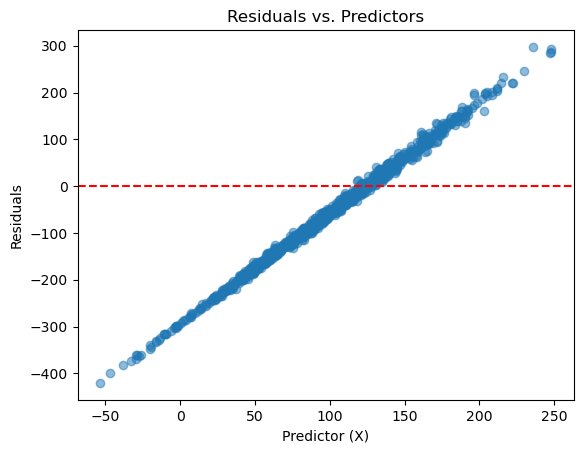

In [83]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt

def generate_data(N, alpha, beta, true_c, true_d):
    '''
    Generate dataset with potential heteroskedasticity
    '''
    X = np.random.normal(loc=100, scale=50, size=N)
    if true_d == 0:
        u = np.random.normal(loc=true_c, scale=1, size=N)
    else:
        u = np.random.normal(loc=true_c, scale=np.sqrt(true_d * np.abs(X)), size=N)
    y = alpha + beta * X + u
    return y, X

def gmm_objective(params, y, X):
    alpha, beta, sigma2 = params
    u = y - (alpha + beta * X)
    m1 = u * X  # Moment condition for E(u * X) = 0
    m2 = (u**2 - sigma2) * X  # Moment condition for E((u^2 - sigma2) * X) = 0
    
    # Weight matrix
    W = np.eye(2)
    
    # GMM objective function: g'Wg where g is the vector of sample moments
    g = np.array([np.mean(m1), np.mean(m2)])
    return g.T @ W @ g

def fit_gmm(y, X):
    # Initial parameter guesses
    initial_params = [0, 0, np.var(y)]
    
    # Optimize the GMM objective function
    result = optimize.minimize(gmm_objective, initial_params, args=(y, X), method='BFGS')
    
    return result

# Generate data
N = 1000
alpha_true, beta_true = 1, 2
true_c, true_d = 0, 0.5
y, X = generate_data(N, alpha_true, beta_true, true_c, true_d)

# Fit GMM
result = fit_gmm(y, X)

# Print results
print("Optimization Result:")
print("Alpha (Intercept):", result.x[0])
print("Beta (Slope):", result.x[1])
print("Sigma^2 (Variance of u):", result.x[2])

# Plot to show potential heteroskedasticity
plt.scatter(X, y - (result.x[0] + result.x[1] * X), alpha=0.5)
plt.title('Residuals vs. Predictors')
plt.xlabel('Predictor (X)')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()


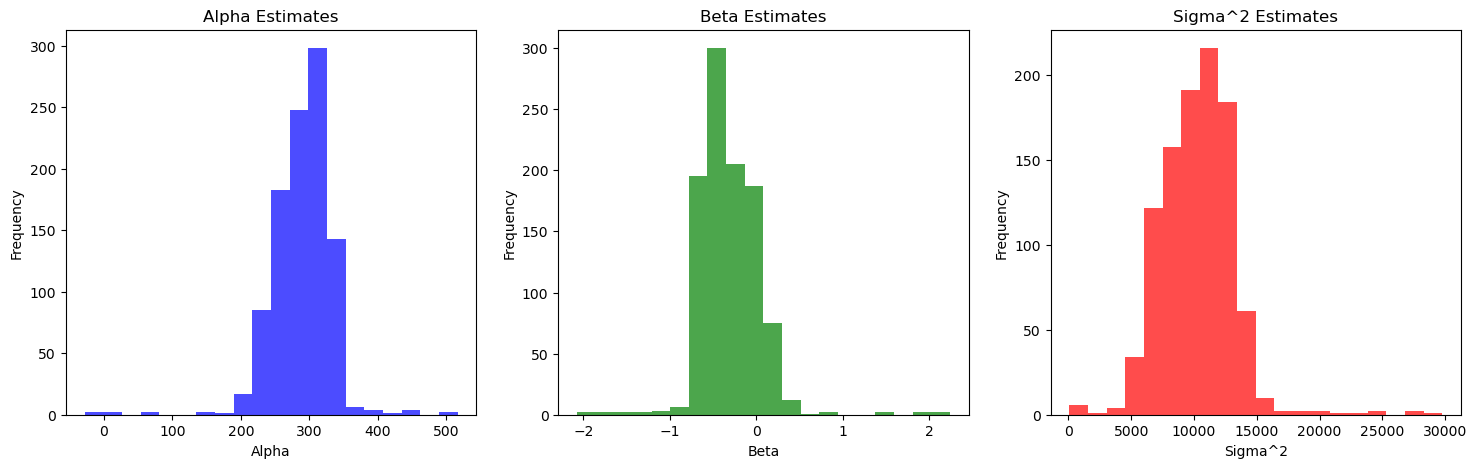

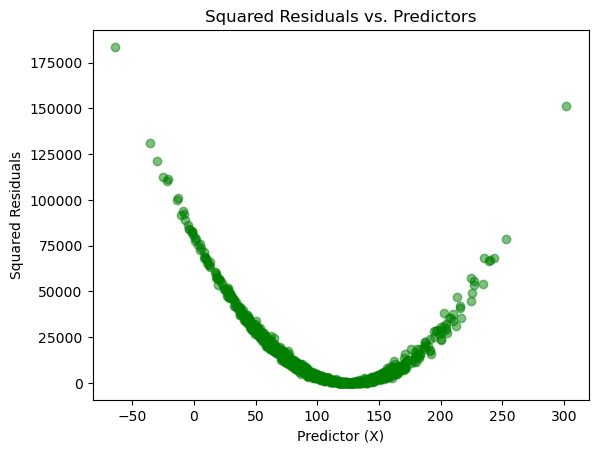

In [85]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt

def generate_data(N, alpha, beta, true_c, true_d):
    '''
    Generate dataset with potential heteroskedasticity
    '''
    X = np.random.normal(loc=100, scale=50, size=N)
    if true_d == 0:
        u = np.random.normal(loc=true_c, scale=1, size=N)
    else:
        u = np.random.normal(loc=true_c, scale=np.sqrt(true_d * np.abs(X)), size=N)
    y = alpha + beta * X + u
    return y, X

def gmm_objective(params, y, X):
    alpha, beta, sigma2 = params
    u = y - (alpha + beta * X)
    m1 = u * X  # Moment condition for E(u * X) = 0
    m2 = (u**2 - sigma2) * X  # Moment condition for E((u^2 - sigma2) * X) = 0
    
    # Weight matrix, which can be more complex in a real application
    W = np.eye(2)
    
    # GMM objective function: g'Wg where g is the vector of sample moments
    g = np.array([np.mean(m1), np.mean(m2)])
    return g.T @ W @ g

def fit_gmm(y, X):
    initial_params = [0, 0, np.var(y)]
    result = optimize.minimize(gmm_objective, initial_params, args=(y, X), method='BFGS')
    return result

def monte_carlo_simulation(num_simulations, N, alpha_true, beta_true, true_c, true_d):
    alpha_estimates = []
    beta_estimates = []
    sigma_estimates = []
    
    for i in range(num_simulations):
        y, X = generate_data(N, alpha_true, beta_true, true_c, true_d)
        result = fit_gmm(y, X)
        alpha_estimates.append(result.x[0])
        beta_estimates.append(result.x[1])
        sigma_estimates.append(result.x[2])
        
        if i == 0:  # Save the first simulation data for heteroskedasticity demonstration
            residuals = y - (result.x[0] + result.x[1] * X)
            squared_residuals = residuals**2
            x_values = X

    # Visualization of Parameter Estimates
    plt.figure(figsize=(18, 5))
    plt.subplot(131)
    plt.hist(alpha_estimates, bins=20, color='blue', alpha=0.7)
    plt.title('Alpha Estimates')
    plt.xlabel('Alpha')
    plt.ylabel('Frequency')

    plt.subplot(132)
    plt.hist(beta_estimates, bins=20, color='green', alpha=0.7)
    plt.title('Beta Estimates')
    plt.xlabel('Beta')
    plt.ylabel('Frequency')

    plt.subplot(133)
    plt.hist(sigma_estimates, bins=20, color='red', alpha=0.7)
    plt.title('Sigma^2 Estimates')
    plt.xlabel('Sigma^2')
    plt.ylabel('Frequency')

    plt.show()

    # Plot to show potential heteroskedasticity
    plt.scatter(x_values, squared_residuals, alpha=0.5, color='green')
    plt.title('Squared Residuals vs. Predictors')
    plt.xlabel('Predictor (X)')
    plt.ylabel('Squared Residuals')
    plt.show()

# Parameters for the simulation
num_simulations = 1000
N = 1000
alpha_true, beta_true = 1, 2
true_c, true_d = 0, 0.5

# Run the Monte Carlo simulation
monte_carlo_simulation(num_simulations, N, alpha_true, beta_true, true_c, true_d)


## Normality

### Using the analogy principle, construct an estimator for the first k moments of the distribution of x. Use this to define a k-vector of moment restrictions gN (µ, σ) satisfying EgN (µ, σ) = 0 under the null hypothesis of normality.

Calculated Moment Restrictions: [-3.44169138e-17 -7.27073441e-01  4.68825279e-02 -4.17891225e+00
 -5.57944947e-01]


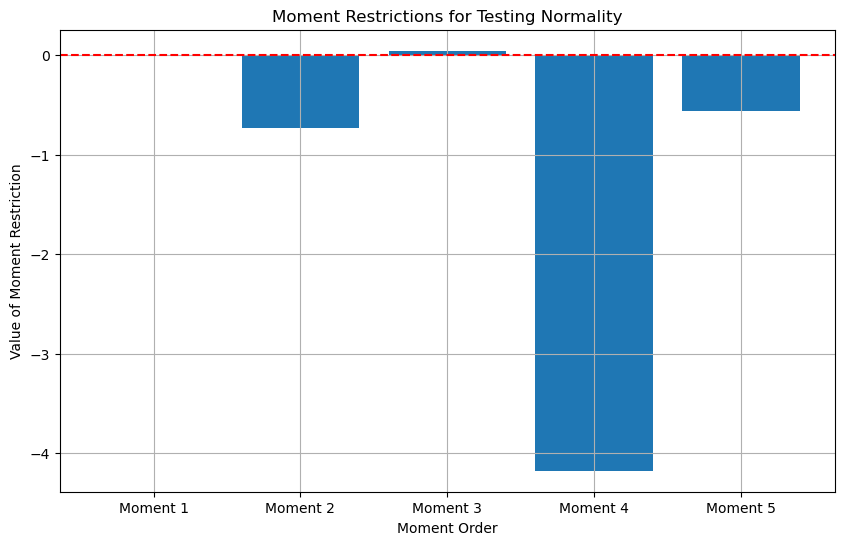

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def estimate_moments(x, k):
    sample_mean = np.mean(x)
    moments = np.zeros(k)
    for m in range(1, k+1):
        moments[m-1] = np.mean((x - sample_mean)**m)
    return moments

def moment_restrictions(x, k, estimated_sigma):
    moments = estimate_moments(x, k)
    restrictions = np.zeros(k)
    for m in range(1, k+1):
        if m % 2 == 1:  # odd m
            restrictions[m-1] = moments[m-1]
        else:           # even m
            double_factorial = np.prod(np.arange(m, 0, -2))
            restrictions[m-1] = moments[m-1] - (estimated_sigma**m * double_factorial)
    return restrictions

# Generate a sample from a normal distribution
np.random.seed(123)
sample_size = 100
true_mu = 0
true_sigma = 1
sample = np.random.normal(true_mu, true_sigma, sample_size)

# Calculate moment restrictions for first 4 moments
k = 5
calculated_restrictions = moment_restrictions(sample, k, true_sigma)

# Output the calculated restrictions
print("Calculated Moment Restrictions:", calculated_restrictions)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(range(1, k+1), calculated_restrictions, tick_label=[f"Moment {i}" for i in range(1, k+1)])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Moment Order")
plt.ylabel("Value of Moment Restriction")
plt.title("Moment Restrictions for Testing Normality")
plt.grid(True)
plt.show()

###  Covariance matrix

Covariance Matrix of Moment Restrictions:
[[ 2.98049692e-34  2.40879145e-20  7.13029024e-21 -1.02357684e-20
   1.21650698e-19]
 [ 2.40879145e-20  1.98442787e-03 -2.62584142e-05  1.19235257e-02
   3.46873767e-04]
 [ 7.13029024e-21 -2.62584142e-05  5.96145465e-03 -2.53497433e-04
   5.88436092e-02]
 [-1.02357684e-20  1.19235257e-02 -2.53497433e-04  9.45606534e-02
   2.50340607e-04]
 [ 1.21650698e-19  3.46873767e-04  5.88436092e-02  2.50340607e-04
   6.80225588e-01]]


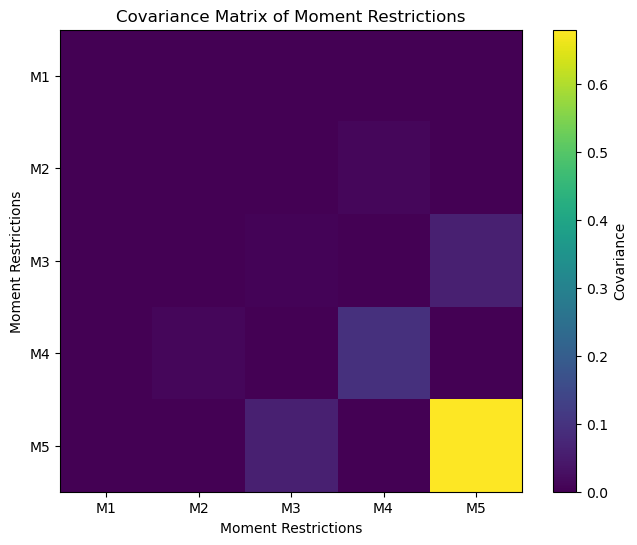

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def sample_moment_restrictions(sample_size, k, true_sigma, num_samples=1000):
    """
    Generate multiple samples and calculate their moment restrictions.
    
    Args:
    sample_size (int): Number of observations in each sample.
    k (int): Number of moments to calculate.
    true_sigma (float): Assumed standard deviation under the null hypothesis.
    num_samples (int): Number of samples to generate.
    
    Returns:
    array: Array of moment restrictions for each sample.
    """
    samples = np.random.normal(0, true_sigma, (num_samples, sample_size))
    restriction_samples = np.array([moment_restrictions(sample, k, true_sigma) for sample in samples])
    return restriction_samples

def calculate_covariance(restriction_samples):
    """
    Calculate the covariance matrix of the sample moment restrictions.
    
    Args:
    restriction_samples (array): Array of moment restrictions for each sample.
    
    Returns:
    array: Covariance matrix of the moment restrictions.
    """
    mean_restrictions = np.mean(restriction_samples, axis=0)
    centered = restriction_samples - mean_restrictions
    covariance_matrix = np.dot(centered.T, centered) / (centered.shape[0] - 1)
    return covariance_matrix

# Settings for the simulation
np.random.seed(123)
sample_size = 1000
true_mu = 0
true_sigma = 1
k = 5
num_samples = 1000

# Generate multiple samples and calculate their moment restrictions
restriction_samples = sample_moment_restrictions(sample_size, k, true_sigma, num_samples)

# Calculate the covariance matrix of the sample moment restrictions
covariance_matrix = calculate_covariance(restriction_samples)

# Output the covariance matrix
print("Covariance Matrix of Moment Restrictions:")
print(covariance_matrix)

# Optionally, display this matrix using a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(covariance_matrix, cmap='viridis', interpolation='none')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix of Moment Restrictions')
plt.xlabel('Moment Restrictions')
plt.ylabel('Moment Restrictions')
plt.xticks(range(k), [f'M{m+1}' for m in range(k)])
plt.yticks(range(k), [f'M{m+1}' for m in range(k)])
plt.show()


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, pinv
from scipy.stats import chi2

def gmm_objective(moments, cov_matrix):
    weighted_moments = np.dot(moments.T, inv(cov_matrix))
    test_statistic = np.dot(weighted_moments, moments)
    return test_statistic

def perform_gmm_test(sample, k, estimated_sigma, num_samples=1000):
 
    # Calculate moment restrictions for the sample
    sample_moments = moment_restrictions(sample, k, estimated_sigma)
    
    # Generate multiple samples to estimate the covariance matrix
    restriction_samples = sample_moment_restrictions(len(sample), k, estimated_sigma, num_samples)
    
    # Calculate the covariance matrix of the moment restrictions
    cov_matrix = calculate_covariance(restriction_samples)
    
    # Calculate the GMM test statistic
    test_statistic = gmm_objective(sample_moments, cov_matrix)
    
    # Degrees of freedom equals the number of moment conditions
    df = k
    
    # Calculate p-value
    p_value = 1 - chi2.cdf(test_statistic, df)
    
    return test_statistic, p_value

# Generate a sample from a normal distribution
sample = np.random.normal(0, true_sigma, sample_size)

# Perform the GMM test
test_statistic, p_value = perform_gmm_test(sample, k, true_sigma, num_samples)

print(f"Test Statistic: {test_statistic:.4f}")
print(f"P-value: {p_value:.4f}")


Test Statistic: 646.5117
P-value: 0.0000


 A p-value of 0.0000 strongly suggests that we reject the null hypothesis at any conventional significance level 0.01. This means that the evidence from your sample strongly suggests it does not come from a normal distribution based on the moments tested.

### GMM-based test of the hypothesis of normality, taking k > 2

In [73]:
import numpy as np
import scipy.stats as stats
from numpy.linalg import pinv
from scipy.stats import chi2

def moment_functions(x, mu, sigma):
    return np.array([
        np.mean(x) - mu,
        np.mean((x - np.mean(x))**2) - sigma**2,
        stats.skew(x),
        stats.kurtosis(x, fisher=False) - 3
    ])

def bootstrap_moments(x, num_bootstrap, moment_func):
    bootstrapped_moments = []
    n = len(x)
    for _ in range(num_bootstrap):
        sample_indices = np.random.choice(np.arange(n), size=n, replace=True)
        sample = x[sample_indices]
        mu_est = np.mean(sample)
        sigma_est = np.std(sample, ddof=1)
        moments = moment_func(sample, mu_est, sigma_est)
        bootstrapped_moments.append(moments)
    return np.array(bootstrapped_moments)

def calculate_covariance(moment_samples):
    mean_moments = np.mean(moment_samples, axis=0)
    deviations = moment_samples - mean_moments
    cov_matrix = np.dot(deviations.T, deviations) / (len(moment_samples) - 1)
    return cov_matrix

# Example usage
np.random.seed(123)
mu_true, sigma_true, N = 0, 1, 1000
x = np.random.normal(mu_true, sigma_true, size=N)
num_bootstrap = 1000

# Bootstrap moments
moment_samples = bootstrap_moments(x, num_bootstrap, moment_functions)

# Compute covariance matrix
cov_matrix = calculate_covariance(moment_samples)

# Use the pseudoinverse in the GMM objective calculation
W = pinv(cov_matrix)

# Calculate moment restrictions for the original sample
original_moments = moment_functions(x, np.mean(x), np.std(x, ddof=1))

# Compute the GMM objective
Q = np.dot(np.dot(original_moments.T, W), original_moments)

# Compute test statistic
test_statistic = N * Q
p_value = 1 - chi2.cdf(test_statistic, df=len(original_moments))

print("Test Statistic:", test_statistic)
print("P-Value:", p_value)


Test Statistic: 544159.739103003
P-Value: 0.0


With a test statistic of 544159.739103003 and a p-value of 0.0, the results indicate an strong rejection of the null hypothesis that the data are drawn from a normal distribution based on the GMM framework with the chosen moment conditions.

###  Implement the Generalized Method of Moments (GMM)-based test for normality using the Python libraries scipy.stats and scipy.optimize

In [75]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize
from numpy.linalg import pinv
from scipy.stats import chi2

def moment_functions(x, params):
    mu, sigma = params
    moments = np.array([
        np.mean(x) - mu,
        np.mean((x - np.mean(x))**2) - sigma**2,
        stats.skew(x),
        stats.kurtosis(x, fisher=False) - 3
    ])
    return moments

def gmm_objective(params, x, W):
    moments = moment_functions(x, params)
    return moments.T @ W @ moments

def bootstrap_moments(x, num_samples, moment_func):
    n = len(x)
    bootstrapped_moments = np.zeros((num_samples, 4))  # Assume 4 moments: mean, variance, skewness, kurtosis
    for i in range(num_samples):
        sample = np.random.choice(x, size=n, replace=True)
        bootstrapped_moments[i, :] = moment_func(sample, (np.mean(sample), np.std(sample, ddof=1)))
    return bootstrapped_moments

def main(x, num_bootstrap=1000):
    # Initial parameter estimates
    initial_params = [np.mean(x), np.std(x, ddof=1)]
    #initial_params = [np.mean(data), np.std(data)]

    # Bootstrap to estimate covariance matrix of moment conditions
    moment_samples = bootstrap_moments(x, num_bootstrap, moment_functions)
    cov_matrix = np.cov(moment_samples, rowvar=False)
    W = pinv(cov_matrix)  # Use pseudoinverse to ensure invertibility

    # Optimize parameters to minimize the GMM objective
    result = optimize.minimize(gmm_objective, initial_params, args=(x, W))

    # Calculate the GMM objective function at the optimal parameters
    optimal_params = result.x
    test_statistic = gmm_objective(optimal_params, x, W)
    df = 4  # Number of moment conditions

    # Compute p-value
    p_value = 1 - chi2.cdf(test_statistic, df)

    return test_statistic, p_value, optimal_params

# Generate sample data from a normal distribution (for testing)
np.random.seed(123)
sample = np.random.normal(loc=0, scale=1, size=1000)

# Run the GMM test
test_stat, p_val, opt_params = main(sample)
print(f"Test Statistic: {test_stat}")
print(f"P-Value: {p_val}")
print(f"Optimal Parameters (mu, sigma): {opt_params}")


Test Statistic: 0.14247147571912588
P-Value: 0.9975800721892982
Optimal Parameters (mu, sigma): [-0.03956414  1.00078757]


### Optimal K

Choosing the optimal number of moment conditions (𝑘) in a Generalized Method of Moments (GMM) test involves balancing theoretical relevance, sample size, and computational practicality. Typically, for testing normality, the first four moments (mean, variance, skewness, kurtosis) are used because they theoretically characterize the normal distribution. Including more moments requires larger samples to ensure stable estimates and increases computational complexity. While additional moments can enhance the sensitivity of the test to deviations from the hypothesis, they may also dilute its power and complicate interpretation. It's advisable to start with the minimal set of informative moments and consider adding more based on empirical validation, such as cross-validation and sensitivity analyses, to ensure the robustness and accuracy of the model.

### Comparing MLE and GMM

In [76]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize
from numpy.linalg import pinv

def generate_data(mu, sigma, n):
    """Generate random data with normal distribution."""
    return np.random.normal(mu, sigma, n)

def moment_conditions(params, data):
    """Define moment conditions for GMM."""
    mu, sigma = params
    mean_moment = np.mean(data) - mu
    variance_moment = np.mean((data - mu)**2) - sigma**2
    return np.array([mean_moment, variance_moment])

def gmm_objective(params, data):
    """Objective function for GMM to minimize."""
    moments = moment_conditions(params, data)
    return moments.T @ moments  # Simplified weighting matrix (Identity)

def estimate_gmm(data):
    """Estimate parameters using GMM."""
    initial_guess = [np.mean(data), np.std(data)]
    result = optimize.minimize(gmm_objective, initial_guess, args=(data,))
    return result.x  # Returns estimated mu and sigma

def estimate_mle(data):
    """Estimate parameters using MLE."""
    mu, sigma = stats.norm.fit(data)
    return mu, sigma

# Parameters and data generation
np.random.seed(123)
true_mu = 0
true_sigma = 1
n = 1000
data = generate_data(true_mu, true_sigma, n)

# Estimation
gmm_mu, gmm_sigma = estimate_gmm(data)
mle_mu, mle_sigma = estimate_mle(data)

# Output results
print(f"GMM Estimates: mu = {gmm_mu:.4f}, sigma = {gmm_sigma:.4f}")
print(f"MLE Estimates: mu = {mle_mu:.4f}, sigma = {mle_sigma:.4f}")


GMM Estimates: mu = -0.0396, sigma = 1.0008
MLE Estimates: mu = -0.0396, sigma = 1.0008


In large samples from a truly normal distribution, the estimates from GMM and MLE should be very close, showcasing the consistency of both estimators.

However, sometimes they differ because of:

Assumptions: MLE's assumptions about the distribution shape the estimates more rigidly than GMM, which only assumes that the chosen moments are valid, allowing for potentially greater flexibility and robustness in the presence of model misspecifications or unusual data structures.
Robustness: GMM can be more robust to certain anomalies in data (like non-normality) if the moments chosen capture these aspects well. MLE, while statistically efficient, might yield estimates that are less robust under these conditions due to its reliance on the correctness of the assumed distribution model.

In [79]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2

# Sample data: Replace these with your actual data
np.random.seed(123)
x = np.random.normal(0, 1, 100)
y = 1 + 2 * x + np.random.normal(0, 1, 100) * (1 + 0.5 * x)

# Adding a constant to the predictor for the intercept
X = sm.add_constant(x)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Calculating residuals
residuals = model.resid

# Squaring the residuals
squared_residuals = residuals**2

# Regressing squared residuals on the original independent variables
model_squared_resid = sm.OLS(squared_residuals, X).fit()

# Compute the Lagrange Multiplier statistic
lm_stat = model_squared_resid.nobs * model_squared_resid.rsquared

# Degrees of freedom equals the number of regressors excluding the intercept
df = len(model_squared_resid.params) - 1

# Compute the p-value for the LM statistic
p_value = chi2.sf(lm_stat, df)

print(f"Lagrange Multiplier statistic: {lm_stat}")
print(f"p-value: {p_value}")

Lagrange Multiplier statistic: 26.462846359725877
p-value: 2.6865586773652624e-07
